In [62]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torch.utils.data as Data
import imageio
from keras import backend as K
K.clear_session()

# Random data

In [58]:
N=2000
v=np.random.uniform(-1, 1, [N,1])+1j*np.random.uniform(-1, 1, [N,1])
v=v/np.max(np.abs(v))
v = v.asstype(np.complex64)
y=(-0.4+0.05*1j)*v+(1.2-0.5*1j)*np.power(v,2)-(0.2)*np.power(v,3)
print(v.shape)
#y = np.power(v,2)
y = y.astype(np.complex64)
def normalize(criteria):
  # mean normalization
  max = np.max(criteria)
  min = np.min(criteria)
  avg = np.mean(criteria)
  return (criteria-avg)/(max-min)

v=0.5*normalize(v).astype(np.complex64)
y=0.5*normalize(y).astype(np.complex64)




plt.plot(np.abs(v), np.abs(y),'.')

AttributeError: 'numpy.ndarray' object has no attribute 'asstype'

# Real (Measured) data

In [2]:
! git clone https://gitlab.com/Gotthans/pa_nn_data.git

Cloning into 'pa_nn_data'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [63]:
import scipy.io
v = (scipy.io.loadmat('PA_data_for_NN/rfsoc_nn_training.mat')['x'][0]).astype(np.complex64)
v = np.reshape(v,(-1,1))
y = (scipy.io.loadmat('PA_data_for_NN/rfsoc_nn_training.mat')['y'][0]).astype(np.complex64)
y = np.reshape(y,(-1,1))

In [52]:
print(y.shape)
print(y.shape)

(6816000, 1)
(6816000, 1)


In [64]:
#plt.plot(np.abs(v), np.abs(y),'.')

def normalize(criteria):
  # mean normalization
  max = np.max(criteria)
  min = np.min(criteria)
  avg = np.mean(criteria)
  return (criteria-avg)/(max-min)

v=normalize(v).astype(np.complex64)
y=normalize(y).astype(np.complex64)


#v = np.concatenate((v, v), axis=0)
#y = np.concatenate((y, y), axis=0)



#plt.plot(np.abs(v), np.abs(y),'.')

In [65]:
y = np.reshape(y,(-1,2))
v = np.reshape(v,(-1,2))

# Complex NN

In [55]:
import numpy as np
import tensorflow as tf
import keras.backend as K

import cvnn.layers as complex_layers
#from cvnn.losses import ComplexMeanSquareError


def custom_loss(y_true, y_pred):
            
    # calculate loss, using y_pred
    #loss = K.mean(K.square(K.abs(y_true-y_pred)))
    loss = K.sum(K.sqrt((K.square(tf.math.real(y_true)-tf.math.real(y_pred))+K.square(tf.math.imag(y_true)-tf.math.imag(y_pred)))))

    return loss

"""def get_model():
    model = tf.keras.models.Sequential()

    model.add(complex_layers.ComplexDense(1, activation='linear'))
    model.add(complex_layers.ComplexDense(100, activation='cart_sigmoid'))
    model.add(complex_layers.ComplexDense(100, activation='cart_sigmoid'))
    model.add(complex_layers.ComplexDense(50, activation='cart_sigmoid'))
    model.add(complex_layers.ComplexDense(10, activation='cart_sigmoid'))
    model.add(complex_layers.ComplexDense(1, activation='linear'))   
    return model"""
def get_model():
    model = tf.keras.models.Sequential()
    model.add(complex_layers.ComplexInput(input_shape=(2)))
    model.add(complex_layers.ComplexDense(2, activation='linear'))
    model.add(complex_layers.ComplexDense(100, activation='cart_sigmoid'))
    model.add(complex_layers.ComplexDense(100, activation='cart_sigmoid'))
    model.add(complex_layers.ComplexDense(50, activation='cart_sigmoid'))
    model.add(complex_layers.ComplexDense(10, activation='cart_sigmoid'))
    model.add(complex_layers.ComplexDense(2, activation='linear'))   
    return model

model = get_model()   # Get your model




"""lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=100,
    decay_rate=0.9)"""

# Compile as any TensorFlow model
"""model.compile(tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['mean_squared_error'],
              loss=custom_loss)"""


#model.compile(tf.keras.optimizers.RMSprop(), metrics=['mean_squared_error'], loss=custom_loss)


model.compile(tf.keras.optimizers.Adam(), metrics=['mean_squared_error'], loss=custom_loss)
#input_shape = None,1
#model.build(input_shape)
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
complex_dense (ComplexDense) (None, 2)                 12        
_________________________________________________________________
complex_dense_1 (ComplexDens (None, 100)               600       
_________________________________________________________________
complex_dense_2 (ComplexDens (None, 100)               20200     
_________________________________________________________________
complex_dense_3 (ComplexDens (None, 50)                10100     
_________________________________________________________________
complex_dense_4 (ComplexDens (None, 10)                1020      
_________________________________________________________________
complex_dense_5 (ComplexDens (None, 2)                 44        
Total params: 31,976
Trainable params: 31,976
Non-trainable params: 0
__________________________________________________

In [56]:
# Train and evaluate
history = model.fit(v, y, epochs=100, batch_size = 1000, validation_split=0.2)
#plt.plot(history.history['loss'])


Epoch 1/100
2727/2727 [==============================] - 8s 3ms/step - loss: 127.2558 - mean_squared_error: 0.0047 - val_loss: 48.8801 - val_mean_squared_error: 4.5188e-04
Epoch 2/100
2727/2727 [==============================] - 8s 3ms/step - loss: 40.9211 - mean_squared_error: 2.8466e-04 - val_loss: 39.3346 - val_mean_squared_error: 2.6347e-04
Epoch 3/100
2727/2727 [==============================] - 8s 3ms/step - loss: 37.0560 - mean_squared_error: 2.3066e-04 - val_loss: 37.3864 - val_mean_squared_error: 2.1912e-04
Epoch 4/100
2727/2727 [==============================] - 8s 3ms/step - loss: 35.8095 - mean_squared_error: 2.1442e-04 - val_loss: 36.6285 - val_mean_squared_error: 2.1835e-04
Epoch 5/100
2727/2727 [==============================] - 8s 3ms/step - loss: 35.3922 - mean_squared_error: 2.0912e-04 - val_loss: 35.9687 - val_mean_squared_error: 2.2871e-04
Epoch 6/100
2727/2727 [==============================] - 7s 3ms/step - loss: 35.2062 - mean_squared_error: 2.0726e-04 - val_loss

In [57]:

y2= model.predict(v)

(6816000, 1)
(6816000, 1)
(6816000, 1)


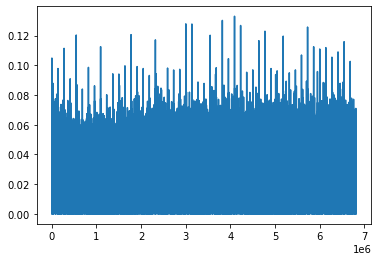

In [61]:
print(v.shape)
print(y.shape)
print(y2.shape)
v = np.reshape(v,(-1,1))
y = np.reshape(y,(-1,1))
y2 = np.reshape(y2,(-1,1))

plt.plot(np.abs(y-y2))

-20.91090440750122


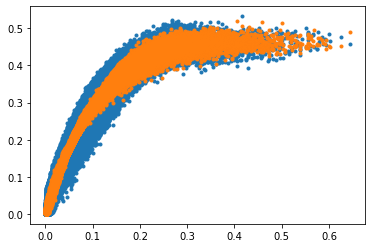

In [59]:
plt.plot(np.abs(v), np.abs(y),'.')
plt.plot(np.abs(v), np.abs(y2),'.')

#error=(np.sum(np.abs(y-y2))/N)*100
#NMSE
error=10*np.log10(np.sum(np.square(np.abs(y-y2)))/np.sum(np.square(np.abs(y))))
print(error)

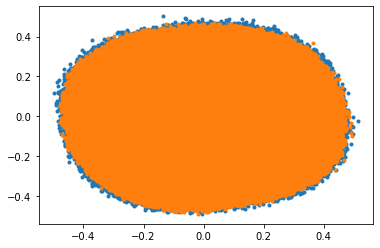

In [60]:
plt.plot(np.real(y), np.imag(y), '.')
plt.plot(np.real(y2), np.imag(y2), '.')


# NN with splitted inputs

In [66]:
# v input data
# y output data
input_v = np.concatenate([v.real, v.imag], axis=1)
output_y = np.concatenate([y.real, y.imag], axis=1)
input_v = input_v.astype(float)
output_y = output_y.astype(float)
print(input_v[:2])
print(v[:2])
print(output_y[:2])
print(y[:2])

[[5.63974891e-06 5.63768390e-06 1.99485680e-06 1.99291230e-06]
 [5.63545609e-06 5.63861659e-06 1.98946532e-06 1.98865405e-06]]
[[5.6397489e-06+1.9948568e-06j 5.6376839e-06+1.9929123e-06j]
 [5.6354561e-06+1.9894653e-06j 5.6386166e-06+1.9886540e-06j]]
[[-0.00135503  0.00264729  0.00116611 -0.0001863 ]
 [ 0.00318816  0.00409739  0.00095825  0.00203333]]
[[-0.00135503+0.00116611j  0.00264729-0.0001863j ]
 [ 0.00318816+0.00095825j  0.00409739+0.00203333j]]


In [67]:
print(input_v.shape)
print(output_y.shape)

(3408000, 4)
(3408000, 4)


In [74]:
import numpy as np
import tensorflow as tf
import keras.backend as K

def get_model2():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(4, activation='linear'))
    model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(50, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(20, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(4, activation='linear'))   
    return model


model2 = get_model2()   # Get your model


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=100,
    decay_rate=0.9)

# Compile as any TensorFlow model
#model2.compile(tf.keras.optimizers.Adam(), loss="MSE")
model2.compile(optimizer = "Adam", loss = "MSE", 
              metrics =["accuracy"])


In [75]:
input_shape = None,4
model2.build(input_shape)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  20        
_________________________________________________________________
dense_7 (Dense)              multiple                  500       
_________________________________________________________________
dense_8 (Dense)              multiple                  10100     
_________________________________________________________________
dense_9 (Dense)              multiple                  5050      
_________________________________________________________________
dense_10 (Dense)             multiple                  1020      
_________________________________________________________________
dense_11 (Dense)             multiple                  84        
Total params: 16,774
Trainable params: 16,774
Non-trainable params: 0
__________________________________________________

In [76]:
history2 = model2.fit(input_v, output_y, epochs=100, batch_size = 1000, validation_split=0.2)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

2727/2727 [==============================] - 6s 2ms/step - loss: 0.0060 - accuracy: 0.4518 - val_loss: 0.0014 - val_accuracy: 0.4991
Epoch 2/100
2727/2727 [==============================] - 6s 2ms/step - loss: 0.0011 - accuracy: 0.6229 - val_loss: 8.1849e-04 - val_accuracy: 0.7014
Epoch 3/100
2727/2727 [==============================] - 5s 2ms/step - loss: 8.2593e-04 - accuracy: 0.7014 - val_loss: 8.1645e-04 - val_accuracy: 0.6978
Epoch 4/100
2727/2727 [==============================] - 6s 2

In [77]:
output_y2= model2.predict(input_v)

In [78]:
print(output_y.shape)
print(output_y2.shape)
print(output_y[:2])
print(output_y2[:2])

(3408000, 4)
(3408000, 4)
[[-0.00135503  0.00264729  0.00116611 -0.0001863 ]
 [ 0.00318816  0.00409739  0.00095825  0.00203333]]
[[-0.00113331 -0.0003529   0.00149768  0.00143241]
 [-0.00113332 -0.00035294  0.0014977   0.00143241]]


(1704000, 4)
(1704000, 4)
[[-0.00135503+0.00116611j]
 [ 0.00264729-0.0001863j ]]
[[0.00316871-0.00381133j]
 [0.00425211-0.00028221j]]


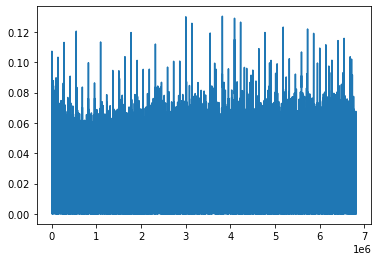

In [48]:
output_y2_complex = np.empty((len(output_y2),4),dtype=complex)

for i in range (0,len(output_y2)):
    output_y2_complex[i,0] = output_y2[i,0]+1j*output_y2[i,4]
    output_y2_complex[i,1] = output_y2[i,1]+1j*output_y2[i,5]
    output_y2_complex[i,2] = output_y2[i,2]+1j*output_y2[i,6]
    output_y2_complex[i,3] = output_y2[i,3]+1j*output_y2[i,7]
print(output_y2_complex.shape)
print(y.shape)
y = np.reshape(y,(-1,1))
output_y2_complex = np.reshape(output_y2_complex,(-1,1))
plt.plot(np.abs(y-output_y2_complex))
print(y[:2])
print(output_y2_complex[:2])


-20.958063773177233


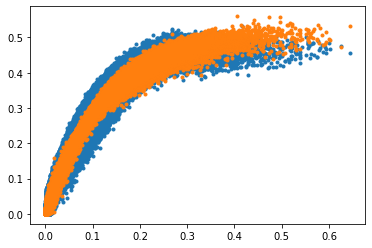

In [49]:
v = np.reshape(v,(-1,1))
plt.plot(np.abs(v), np.abs(y),'.')
plt.plot(np.abs(v), np.abs(output_y2_complex),'.')

#error=(np.sum(np.abs(y-y2))/N)*100
#NMSE
error=10*np.log10(np.sum(np.square(np.abs(y-output_y2_complex))/np.sum(np.square(np.abs(y)))))
print(error)

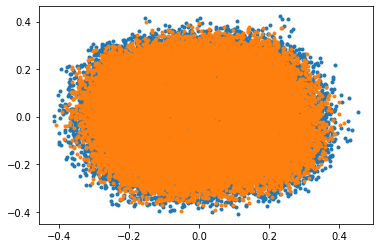

In [50]:
plt.plot(np.real(y[:20000]), np.imag(y[:20000]), '.')
plt.plot(np.real(output_y2_complex[:20000]), np.imag(output_y2_complex[:20000]), '.')

# Kvadraticka Dense vrstva

In [28]:
from abc import ABC, abstractmethod
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, InputLayer, Layer
from tensorflow.python.keras import backend as K
from tensorflow.keras import initializers
#import tensorflow_probability as tfp
from tensorflow import TensorShape, Tensor
# from keras.utils import control_flow_util
# typing
from typing import Optional, Union, List, Tuple
# Own modules
#from cvnn.activations import t_activation
from cvnn.initializers import ComplexGlorotUniform, Zeros, Ones, ComplexInitializer, INIT_TECHNIQUES


t_input = Union[Tensor, tuple, list]
t_input_shape = Union[TensorShape, List[TensorShape]]

DEFAULT_COMPLEX_TYPE = tf.as_dtype(np.complex64)


class ComplexLayer(ABC):

    @abstractmethod
    def get_real_equivalent(self):
        """
        :return: Gets a real-valued COPY of the Complex Layer.
        """
        pass


def complex_input(shape=None, batch_size=None, name=None, dtype=DEFAULT_COMPLEX_TYPE,
                  sparse=False, tensor=None, ragged=False, **kwargs):
    """
    `complex_input()` is used to instantiate a Keras tensor.
    A Keras tensor is a TensorFlow symbolic tensor object,
    which we augment with certain attributes that allow us to build a Keras model
    just by knowing the inputs and outputs of the model.
    For instance, if `a`, `b` and `c` are Keras tensors,
    it becomes possible to do:
    `model = Model(input=[a, b], output=c)`
    Arguments:
      shape: A shape tuple (integers), not including the batch size.
          For instance, `shape=(32,)` indicates that the expected input
          will be batches of 32-dimensional vectors. Elements of this tuple
          can be None; 'None' elements represent dimensions where the shape is
          not known.
      batch_size: optional static batch size (integer).
      name: An optional name string for the layer.
          Should be unique in a model (do not reuse the same name twice).
          It will be autogenerated if it isn't provided.
      dtype: The data type expected by the input
      sparse: A boolean specifying whether the placeholder to be created is
          sparse. Only one of 'ragged' and 'sparse' can be True. Note that,
          if `sparse` is False, sparse tensors can still be passed into the
          input - they will be densified with a default value of 0.
      tensor: Optional existing tensor to wrap into the `Input` layer.
          If set, the layer will use the `tf.TypeSpec` of this tensor rather
          than creating a new placeholder tensor.
      ragged: A boolean specifying whether the placeholder to be created is
          ragged. Only one of 'ragged' and 'sparse' can be True. In this case,
          values of 'None' in the 'shape' argument represent ragged dimensions.
          For more information about RaggedTensors, see
          [this guide](https://www.tensorflow.org/guide/ragged_tensors).
      **kwargs: deprecated arguments support. Supports `batch_shape` and
          `batch_input_shape`.
    Returns:
        A `tensor`.
    Example:
    ```python
        # this is a logistic regression in Keras
        x = complex_input(shape=(32,))
        y = Dense(16, activation='softmax')(x)
        model = Model(x, y)
    ```
    Note that even if eager execution is enabled,
    `Input` produces a symbolic tensor (i.e. a placeholder).
    This symbolic tensor can be used with other
    TensorFlow ops, as such:
    ```python
        x = complex_input(shape=(32,))
        y = tf.square(x)
    ```
    Raises:
        ValueError: If both `sparse` and `ragged` are provided.
        ValueError: If both `shape` and (`batch_input_shape` or `batch_shape`) are provided.
        ValueError: If both `shape` and `tensor` are None.
        ValueError: if any unrecognized parameters are provided.
    """
    if sparse and ragged:
        raise ValueError(
            'Cannot set both sparse and ragged to True in a Keras input.')

    dtype = tf.as_dtype(dtype)
    input_layer_config = {'name': name, 'dtype': dtype.name, 'sparse': sparse,
                          'ragged': ragged, 'input_tensor': tensor}

    batch_input_shape = kwargs.pop('batch_input_shape',
                                   kwargs.pop('batch_shape', None))
    if shape is not None and batch_input_shape is not None:
        raise ValueError('Only provide the `shape` OR `batch_input_shape` argument '
                         'to Input, not both at the same time.')
    if batch_input_shape is None and shape is None and tensor is None:
        raise ValueError('Please provide to Input either a `shape`'
                         ' or a `tensor` argument. Note that '
                         '`shape` does not include the batch '
                         'dimension.')
    if kwargs:
        raise ValueError('Unrecognized keyword arguments:', kwargs.keys())

    if batch_input_shape:
        shape = batch_input_shape[1:]
        input_layer_config.update({'batch_input_shape': batch_input_shape})
    else:
        input_layer_config.update(
            {'batch_size': batch_size, 'input_shape': shape})
    # import pdb; pdb.set_trace()
    input_layer = ComplexInput(**input_layer_config)

    # Return tensor including `_keras_history`.
    # Note that in this case train_output and test_output are the same pointer.
    outputs = input_layer._inbound_nodes[0].output_tensors
    if isinstance(outputs, list) and len(outputs) == 1:
        return outputs[0]
    else:
        return outputs


class ComplexInput(InputLayer, ComplexLayer):

    def __init__(self, input_shape=None, batch_size=None, dtype=DEFAULT_COMPLEX_TYPE, input_tensor=None, sparse=False,
                 name=None, ragged=False, **kwargs):
        super(ComplexInput, self).__init__(input_shape=input_shape, batch_size=batch_size, dtype=dtype,
                                           input_tensor=input_tensor, sparse=sparse,
                                           name=name, ragged=ragged, **kwargs
                                           )

    def get_real_equivalent(self):
        real_input_shape = self.input_shape[:-1] + (self.input_shape[-1] * 2,)
        return ComplexInput(input_shape=real_input_shape, batch_size=self.batch_size, dtype=self.dtype,
                            input_tensor=self.input_tensor, sparse=self.sparse, name=self.name + "_real_equiv",
                            ragged=self.ragged)


class ComplexFlatten(Flatten, ComplexLayer):

    def call(self, inputs: t_input):
        # tf.print(f"inputs at ComplexFlatten are {inputs.dtype}")
        real_flat = super(ComplexFlatten, self).call(tf.math.real(inputs))
        imag_flat = super(ComplexFlatten, self).call(tf.math.imag(inputs))
        return tf.cast(tf.complex(real_flat, imag_flat), inputs.dtype)  # Keep input dtype

    def get_real_equivalent(self):
        # Dtype agnostic so just init one.
        return ComplexFlatten(name=self.name + "_real_equiv")


class ComplexDenseQuadratic(Dense, ComplexLayer):
    """
    Fully connected complex-valued layer.
    Implements the operation:
        activation(input * weights + bias)
    * where data types can be either complex or real.
    * activation is the element-wise activation function passed as the activation argument,
    * weights is a matrix created by the layer
    * bias is a bias vector created by the layer
    """

    def __init__(self, units: int, activation: t_activation = None, use_bias: bool = True,
                 kernel_initializer="ComplexGlorotUniform",
                 bias_initializer="Zeros",
                 dtype=DEFAULT_COMPLEX_TYPE,  # TODO: Check typing of this.
                 init_technique: str = 'mirror',
                 **kwargs):
        """
        :param units: Positive integer, dimensionality of the output space.
        :param activation: Activation function to use.
            Either from keras.activations or cvnn.activations. For complex dtype, only cvnn.activations module supported.
            If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
        :param use_bias: Boolean, whether the layer uses a bias vector.
        :param kernel_initializer: Initializer for the kernel weights matrix.
            Recommended to use a `ComplexInitializer` such as `cvnn.initializers.ComplexGlorotUniform()` (default)
        :param bias_initializer: Initializer for the bias vector.
            Recommended to use a `ComplexInitializer` such as `cvnn.initializers.Zeros()` (default)
        :param dtype: Dtype of the input and layer.
        :param init_technique: One of 'mirror' or 'zero_imag'. Tells the initializer how to init complex number if
            the initializer was tensorflow's built in initializers (not supporting complex numbers).
            - 'mirror': Uses the initializer for both real and imaginary part.
                Note that some initializers such as Glorot or He will lose it's property if initialized this way.
            - 'zero_imag': Initializer real part and let imaginary part to zero.
        """
        # TODO: verify the initializers? and that dtype complex has cvnn.activations.
        if activation is None:
            activation = "linear"
        super(ComplexDenseQuadratic, self).__init__(units, activation=activation, use_bias=use_bias,
                                           kernel_initializer=kernel_initializer,
                                           bias_initializer=bias_initializer, **kwargs)
        # !Cannot override dtype of the layer because it has a read-only @property
        self.my_dtype = tf.dtypes.as_dtype(dtype)
        self.init_technique = init_technique.lower()

    def build(self, input_shape):
        if self.my_dtype.is_complex:
            i_kernel_dtype = self.my_dtype if isinstance(self.kernel_initializer,
                                                         ComplexInitializer) else self.my_dtype.real_dtype
            i_bias_dtype = self.my_dtype if isinstance(self.bias_initializer,
                                                       ComplexInitializer) else self.my_dtype.real_dtype
            i_kernel_initializer = self.kernel_initializer
            i_bias_initializer = self.bias_initializer
            if not isinstance(self.kernel_initializer, ComplexInitializer):
                tf.print(f"WARNING: you are using a Tensorflow Initializer for complex numbers. "
                         f"Using {self.init_technique} method.")
                if self.init_technique in INIT_TECHNIQUES:
                    if self.init_technique == 'zero_imag':
                        # This section is done to initialize with tf initializers, making imaginary part zero
                        i_kernel_initializer = initializers.Zeros()
                        i_bias_initializer = initializers.Zeros()
                else:
                    raise ValueError(f"Unsuported init_technique {self.init_technique}, "
                                     f"supported techniques are {INIT_TECHNIQUES}")
            self.w_r = tf.Variable(
                name='kernel_r',
                initial_value=self.kernel_initializer(shape=(input_shape[-1], self.units), dtype=i_kernel_dtype),
                trainable=True
            )
            self.w_i = tf.Variable(
                name='kernel_i',
                initial_value=i_kernel_initializer(shape=(input_shape[-1], self.units), dtype=i_kernel_dtype),
                trainable=True
            )
            if self.use_bias:
                self.b_r = tf.Variable(
                    name='bias_r',
                    initial_value=self.bias_initializer(shape=(self.units,), dtype=i_bias_dtype),
                    trainable=self.use_bias
                )
                self.b_i = tf.Variable(
                    name='bias_i',
                    initial_value=i_bias_initializer(shape=(self.units,), dtype=i_bias_dtype),
                    trainable=self.use_bias
                )
        else:
            # TODO: For Complex you should probably want to use MY init for real keras. DO sth! at least error message
            self.w = self.add_weight('kernel',
                                     shape=(input_shape[-1], self.units),
                                     dtype=self.my_dtype,
                                     initializer=self.kernel_initializer,
                                     trainable=True,
                                     )
            if self.use_bias:
                self.b = self.add_weight('bias', shape=(self.units,), dtype=self.my_dtype,
                                         initializer=self.bias_initializer, trainable=self.use_bias)

    def call(self, inputs: t_input):
        # tf.print(f"inputs at ComplexDense are {inputs.dtype}")
        if inputs.dtype != self.my_dtype:
            tf.print(f"WARNING: {self.name} - Expected input to be {self.my_dtype}, but received {inputs.dtype}.")
            if self.my_dtype.is_complex and inputs.dtype.is_floating:
                tf.print("\tThis is normally fixed using ComplexInput() "
                         "at the start (tf casts input automatically to real).")
            inputs = tf.cast(inputs, self.my_dtype)
        if self.my_dtype.is_complex:
            w = tf.complex(self.w_r, self.w_i)
            if self.use_bias:
                b = tf.complex(self.b_r, self.b_i)
        else:
            w = self.w
            if self.use_bias:
                b = self.b
        out = tf.matmul(tf.square(inputs), w)
        if self.use_bias:
            out = out + b
        return self.activation(out)

    def get_real_equivalent(self, output_multiplier=2):
        # assert self.my_dtype.is_complex, "The layer was already real!"    # TODO: Shall I check this?
        # TODO: Does it pose a problem not to re-create an object of the initializer?
        return ComplexDenseQuadratic(units=int(round(self.units * output_multiplier)),
                            activation=self.activation, use_bias=self.use_bias,
                            kernel_initializer=self.kernel_initializer, bias_initializer=self.bias_initializer,
                            dtype=self.my_dtype.real_dtype, name=self.name + "_real_equiv")

    def get_config(self):
        config = super(ComplexDenseQuadratic, self).get_config()
        config.update({
            'dtype': self.my_dtype,
            'init_technique': self.init_technique

        })
        return config

ImportError: cannot import name 'Ones'

In [ ]:
import numpy as np
import tensorflow as tf
import keras.backend as K

import cvnn.layers as complex_layers
from cvnn.losses import ComplexMeanSquareError


def custom_loss(y_true, y_pred):
            
    # calculate loss, using y_pred
    #loss = K.mean(K.square(K.abs(y_true-y_pred)))
    loss = K.sum(K.sqrt((K.square(tf.math.real(y_true)-tf.math.real(y_pred))+K.square(tf.math.imag(y_true)-tf.math.imag(y_pred)))))
     

    return loss

def get_model3():
    model = tf.keras.models.Sequential()
    model.add(complex_layers.ComplexDense(1, activation='linear'))
    model.add(ComplexDenseQuadratic(1, activation='sigmoid'))
    model.add(complex_layers.ComplexDense(1, activation='linear'))
    return model


model3 = get_model3()   # Get your model

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=100,
    decay_rate=0.9)

# Compile as any TensorFlow model
model3.compile(tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['mean_squared_error'],
              loss=custom_loss)

#model.compile(tf.keras.optimizers.Adam(), metrics=['mean_squared_error'],
#              loss=custom_loss)

In [ ]:
# Train and evaluate
history3 = model3.fit(v, y, epochs=10, batch_size = 1000)

Epoch 1/10
26650/26650 [==============================] - 69s 2ms/step - loss: 3.8180 - mean_squared_error: 2.2128e-05
Epoch 2/10
26650/26650 [==============================] - 62s 2ms/step - loss: 3.3763 - mean_squared_error: 7.9541e-06
Epoch 3/10
26650/26650 [==============================] - 64s 2ms/step - loss: 3.3763 - mean_squared_error: 7.9541e-06
Epoch 4/10
26650/26650 [==============================] - 70s 3ms/step - loss: 3.3763 - mean_squared_error: 7.9541e-06
Epoch 5/10
26650/26650 [==============================] - 66s 2ms/step - loss: 3.3763 - mean_squared_error: 7.9541e-06
Epoch 6/10
26650/26650 [==============================] - 63s 2ms/step - loss: 3.3763 - mean_squared_error: 7.9541e-06
Epoch 7/10
26650/26650 [==============================] - 62s 2ms/step - loss: 3.3763 - mean_squared_error: 7.9541e-06
Epoch 8/10
26650/26650 [==============================] - 68s 3ms/step - loss: 3.3763 - mean_squared_error: 7.9541e-06
Epoch 9/10
26650/26650 [========================

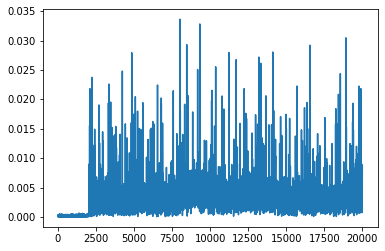

In [ ]:
y4= model3.predict(v[:20000])

plt.plot(np.abs(y[:20000]-y4))

-24.42584753036499


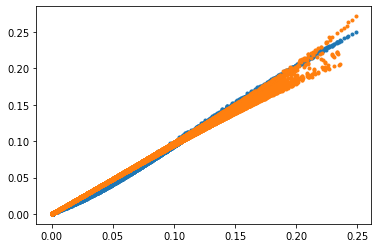

In [ ]:
plt.plot(np.abs(v[:20000]), np.abs(y[:20000]),'.')
plt.plot(np.abs(v[:20000]), np.abs(y4),'.')

#error=(np.sum(np.abs(y-y2))/N)*100
#NMSE
error=10*np.log10(np.sum(np.square(np.abs(y[:20000]-y4)))/np.sum(np.square(np.abs(y[:20000]))))
print(error)

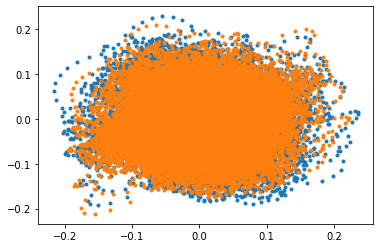

In [ ]:
plt.plot(np.real(y[:20000]), np.imag(y[:20000]), '.')
plt.plot(np.real(y4), np.imag(y4), '.')